# !!! Try putting product id in modelling !!!


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from sklearn.preprocessing import LabelEncoder

In [177]:
df = pd.read_csv('train.csv')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [179]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [180]:
len(df.User_ID.unique())

5891

In [181]:
len(df.Product_ID.unique())

3631

In [182]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Occupation is from 0 to 20

In [183]:
df.pivot_table(index=['Age','Gender'],values='Purchase')

Purchase
Age   Gender             
0-17  F       8338.771985
      M       9235.173670
18-25 F       8343.180201
      M       9440.942971
26-35 F       8728.251754
      M       9410.337578
36-45 F       8959.844056
      M       9453.193643
46-50 F       8842.098947
      M       9357.471509
51-55 F       9042.449666
      M       9705.094802
55+   F       9007.036199
      M       9438.195603

0-17,18-25 F tend to shop less
51-55 FM tend to shop more
55+ F tend to shop more

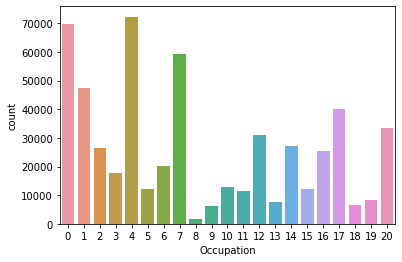

In [184]:
sns.countplot(df.Occupation)


In [185]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [186]:
df.pivot_table(index=['Gender'],values='Purchase')

,Purchase
Gender,
F,8734.565765
M,9437.526040


Males tend to purchase more

In [187]:
df.pivot_table(index=['Marital_Status'],values='Purchase')

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


Marital Status has no contribution

In [188]:
df.pivot_table(index=['Age',],values='Purchase')

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


0-17 spend less, 51-55 spend more so age column can be made into 3 bins

In [189]:
occ_mean = df.pivot_table(index='Occupation',values='Purchase')
occ_mean[(occ_mean['Purchase'] > 9500) | (occ_mean['Purchase'] < 9000)]

,Purchase
Occupation,
1,8953.193270
2,8952.481683
8,9532.592497
9,8637.743761
10,8959.355375
12,9796.640239
14,9500.702772
15,9778.891163
17,9821.478236


11 of them are varying from the mean. Can make total 12 bins

In [190]:
df.pivot_table(index=['City_Category'],values=['Purchase'])

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


Ofcourse City Type is an important Parameter

In [191]:
df.pivot_table(index='Product_ID',values='Purchase').mean()

Purchase    7874.916377
dtype: float64

Mean price of product is 7874

In [192]:
df.pivot_table(index='Product_ID',values='Purchase').min()

Purchase    36.675159
dtype: float64

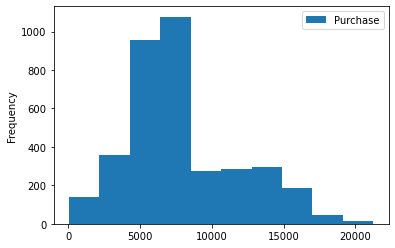

In [193]:
df.pivot_table(index='Product_ID',values='Purchase').plot(kind='hist')

In [194]:
df[~df['Product_Category_2'].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854


In [196]:
'''To create count column for diff features. This helps in adding weights'''

for var in ['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']:   
    d = df[var].value_counts().to_dict()
    c_string = var + '_Count'
    df[c_string] = df[var].map(d)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  User_ID_Count               550068 non-null  int64  
 13  Product_ID_Cou

## Model Training

In [199]:
import catboost as cb

In [200]:
df['Product_Category_2'].fillna(-999,inplace=True)
df['Product_Category_3'].fillna(-999,inplace=True)
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [201]:
Z = df.drop(columns=['Purchase','Product_ID','User_ID'])
y = df['Purchase']

In [204]:
cat_features = Z.drop(columns=['User_ID_Count','Product_ID_Count','Product_Category_1_Count',
                      'Product_Category_2_Count','Product_Category_3_Count']).columns

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=69)

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
from sklearn.metrics import mean_squared_error

In [212]:
params = {'depth': [],
          'learning_rate' : [0.03],
         'l2_leaf_reg': [6],
         'iterations': [500]}
cat_boost = cb.CatBoostRegressor(verbose=0)
cb_model = GridSearchCV(cat_boost, params, cv = 3, verbose =True, n_jobs=-1)
cb_model.fit(X_train, y_train, cat_features=cat_features)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 22.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001EF88CAF908>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [8], 'iterations': [500], 'l2_leaf_reg': [10],
                         'learning_rate': [0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [213]:
y_hat = cb_model.predict(X_test)
print('MSE =',np.sqrt(mean_squared_error(y_test, y_hat)))

MSE = 2711.2877057918768


In [214]:
cb_model.best_params_

{'depth': 8, 'iterations': 500, 'l2_leaf_reg': 10, 'learning_rate': 0.03}

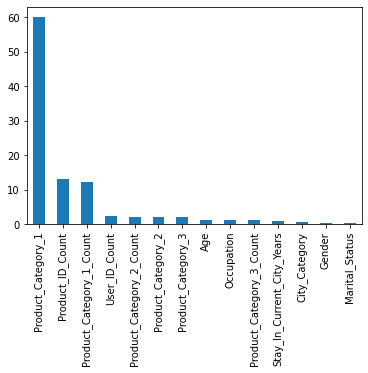

In [215]:
pd.Series(cb_model.best_estimator_.feature_importances_,Z.columns).sort_values(ascending=False).plot(kind='bar')

In [216]:
test = pd.read_csv('test.csv')

In [217]:
test['Product_Category_2'].fillna(-999,inplace=True)
test['Product_Category_3'].fillna(-999,inplace=True)
test['Product_Category_2']=test['Product_Category_2'].astype(int)
test['Product_Category_3']=test['Product_Category_3'].astype(int)

In [218]:
for var in ['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']:   
    d = test[var].value_counts().to_dict()
    c_string = var + '_Count'
    test[c_string] = test[var].map(d)

In [219]:
Z_test = test.drop(columns=['Product_ID','User_ID'])

In [220]:
cb_model.fit(Z,y,cat_features=cat_features)
Yhat = cb_model.predict(Z_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 28.4min finished


In [221]:
df1= pd.DataFrame(Yhat)
df1[['User_ID','Product_ID']] = test[['User_ID','Product_ID']]
df1.rename(columns={0: 'Purchase'}, inplace=True)
df1.head()

,Purchase,User_ID,Product_ID
0,12909.111507,1000004,P00128942
1,11912.686365,1000009,P00113442
2,5397.217184,1000010,P00288442
3,2129.487703,1000010,P00145342
4,1568.038647,1000011,P00053842


In [222]:
export_csv = df1.to_csv(r'C:\Users\DELL\ipynb notebooks\Submission.csv', index = None, header=True)

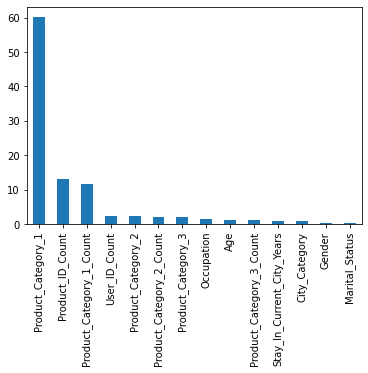

In [223]:
pd.Series(cb_model.best_estimator_.feature_importances_,Z_test.columns).sort_values(ascending=False).plot(kind='bar')